In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')



### Data Set Loading


In [2]:
df = pd.read_csv('hotel_bookings.csv')

### Data Cleaning and Exploration

In [3]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Converting reservation status date from object to date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
for col in df.describe(include = 'object'):
    print(col)
    print(df[col].unique())
    print('_'*55)

hotel
['Resort Hotel' 'City Hotel']
_______________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
_______________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
_______________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA'

In [11]:
# Finding missing values in columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# We will remove the agent and company data as it is of no use and also difficult to handle company data
df.drop(['company','agent'], axis =1, inplace = True)  # columns removed 
df.dropna(inplace = True)                   # Rows of that columns

In [13]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()     # Statistics of numerical columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [16]:
# Handling outliers
df = df[df['adr']<5100]


In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


### Analysis and Visualization

In [35]:
# We will see how much data is cancel

# Getting the value counts
cancel_counts = df['is_canceled'].value_counts()

# Calculating the total number of entries
total_entries = df['is_canceled'].count()

# Calculating the percentage
percentage_cancel = cancel_counts / total_entries * 100

percentage_cancel

is_canceled
0    62.865337
1    37.134663
Name: count, dtype: float64

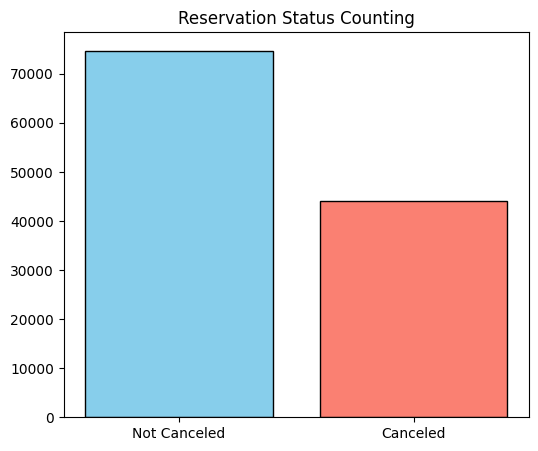

In [49]:
# 37 percent not cancel

plt.figure(figsize = (6,5))
plt.title('Reservation Status Counting')


plt.bar(['Not Canceled', 'Canceled'] , df['is_canceled'].value_counts(), color=['skyblue', 'salmon'], edgecolor = 'k', width = 0.8)

plt.show()

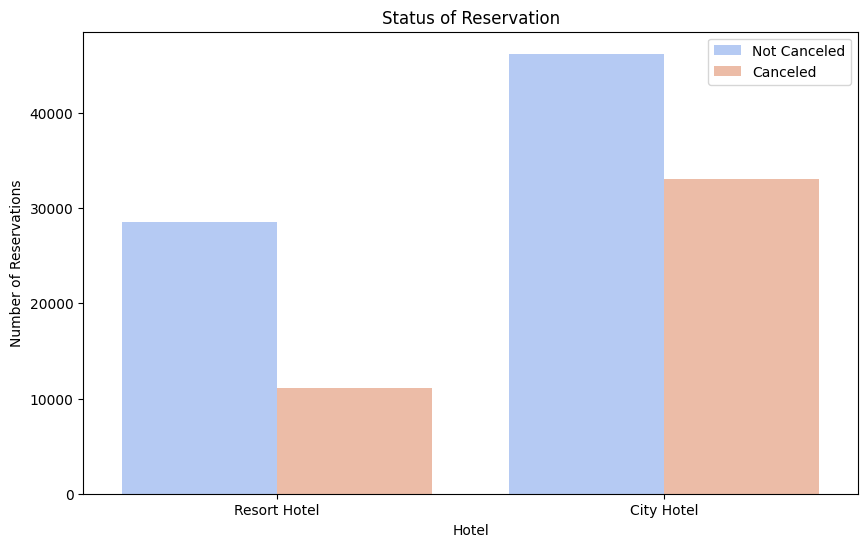

In [42]:
# Now finding cancelation upon hotels 

plt.figure(figsize = (10,6))

axis1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'coolwarm')
legend_labels,_ = axis1.get_legend_handles_labels()
axis1.legend(bbox_to_anchor=(1,1))

plt.title('Status of Reservation')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()



In [44]:
# Fidning percentages

resort_htl = df[df['hotel'] == 'Resort Hotel']
resort_htl['is_canceled'].value_counts(normalize = True)


cancel_counts_resort = resort_htl['is_canceled'].value_counts()

# Calculating the total number of entries
total_entries = resort_htl['is_canceled'].count()

# Calculating the percentage
percentage_cancel = cancel_counts_resort / total_entries * 100
percentage_cancel

is_canceled
0    72.024952
1    27.975048
Name: count, dtype: float64

In [46]:
city_htl = df[df['hotel'] == 'City Hotel']




cancel_counts_city = city_htl['is_canceled'].value_counts()

# Calculating the total number of entries
total_entries = city_htl['is_canceled'].count()

# Calculating the percentage
percentage_cancel = cancel_counts_city / total_entries * 100
percentage_cancel

is_canceled
0    58.291825
1    41.708175
Name: count, dtype: float64

In [23]:
# Now checking whether Price has any effect on the cancelation (As we might have given this factor in our hypothesis)
resort_htl = resort_htl.groupby('reservation_status_date')[['adr']].mean()
city_htl = city_htl.groupby('reservation_status_date')[['adr']].mean()



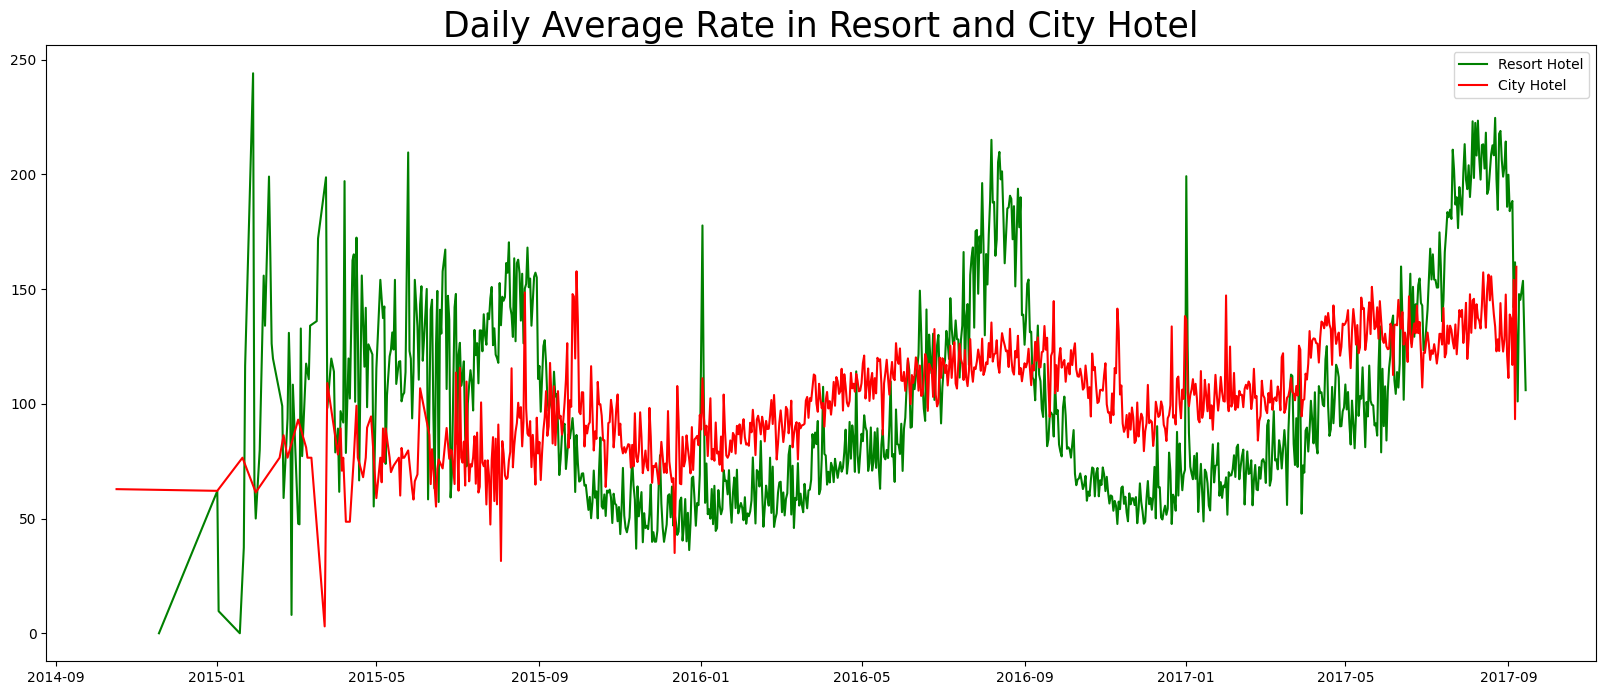

In [24]:
# Visualisation for the average rate for both resort and city hotel
# adr in data means Average Daily Rate
plt.figure(figsize = (20,8))
plt.title('Daily Average Rate in Resort and City Hotel', fontsize = 25)

plt.plot(resort_htl.index, resort_htl['adr'], label = 'Resort Hotel', color = 'green')
plt.plot(city_htl.index, city_htl['adr'], label = 'City Hotel', color = 'red')

# Add a legend
plt.legend()

plt.show()



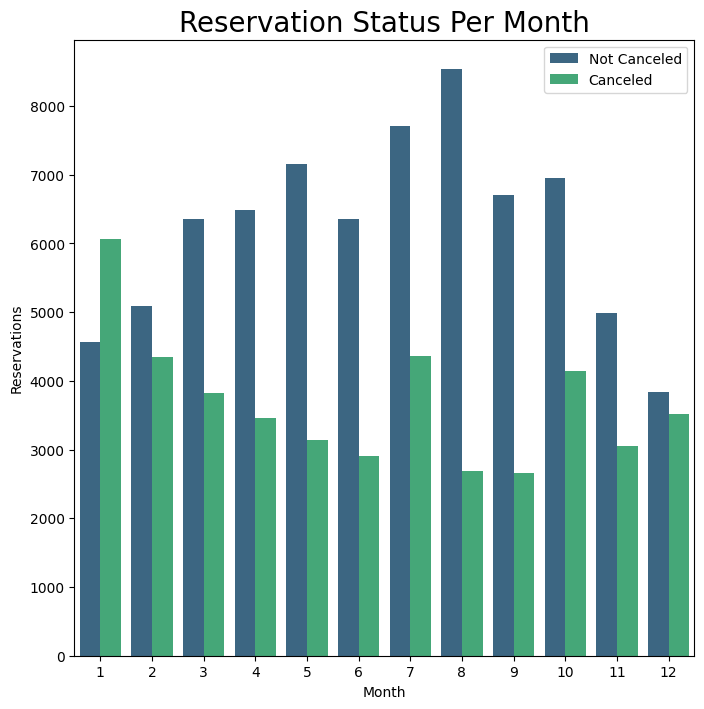

In [47]:
# For Months
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (8,8))

# Change the palette to 'viridis'
axis1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'viridis')

legend_labels,_ = axis1.get_legend_handles_labels()
axis1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status Per Month', size =20)
plt.xlabel('Month')
plt.ylabel('Reservations')
plt.legend(['Not Canceled','Canceled'])
plt.show()


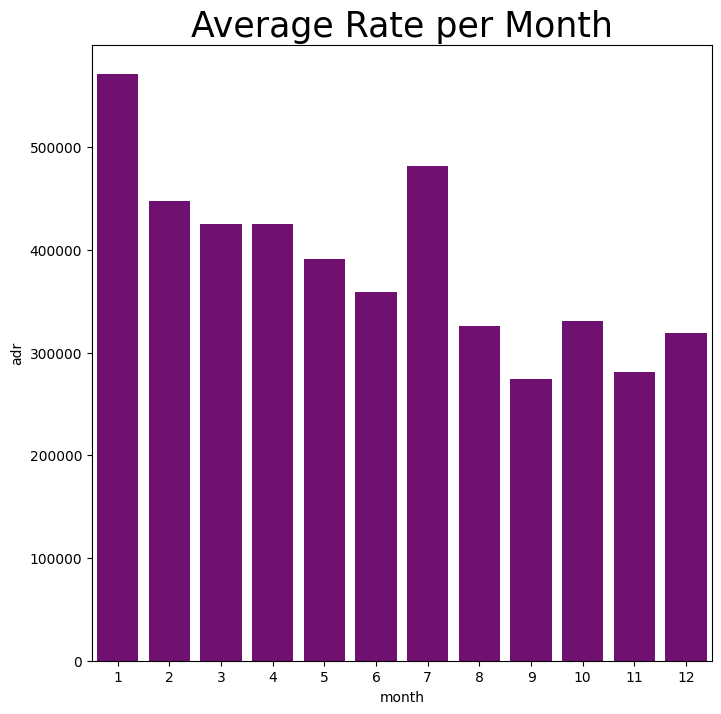

In [51]:
# From above figure we can see that when reservations are high cancelations are low and vice versa
# Now plotting the Avergae rate for each month

plt.figure(figsize = (8,8))
plt.title('Average Rate per Month', fontsize = 25)


sns.barplot(x='month', y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), color='purple')

plt.show()




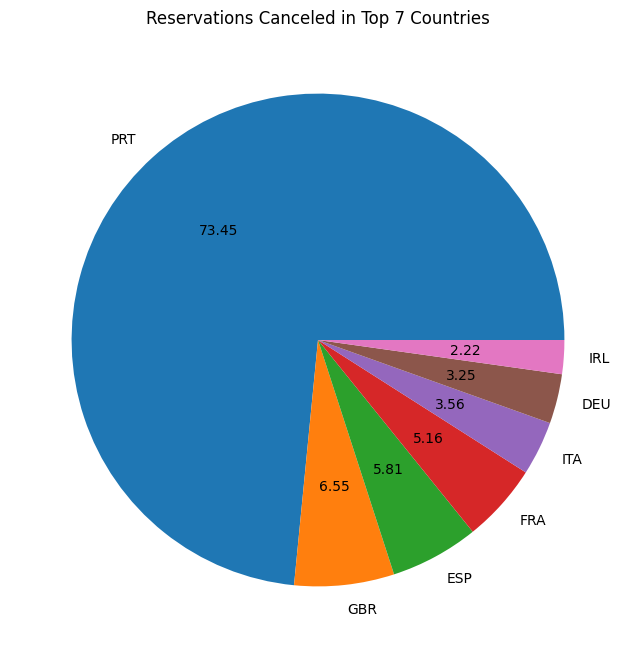

In [27]:
# From above visualiztion , our hypothesis is true that whenever prices will be higher then cancellation rates are also higher as August has lower price as compared to January and it has  reservations

# Now Comapring on basis of countries
# Considering top 7 countries

cancelled = df[df['is_canceled'] == 1]
top_7_ctry = cancelled['country'].value_counts()[:7]
plt.figure(figsize = (8,8))

plt.title('Reservations Canceled in Top 7 Countries')
plt.pie(top_7_ctry, autopct = '%.2f', labels = top_7_ctry.index)
plt.show()



In [28]:
# Results : Higher in Portugal


In [29]:
# Client reference i.e Agents 

df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [30]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [31]:
# So Online Travel agents sends more Customers to hotels

In [32]:
# Now checking that percentage in cancel reservations

cancelled['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

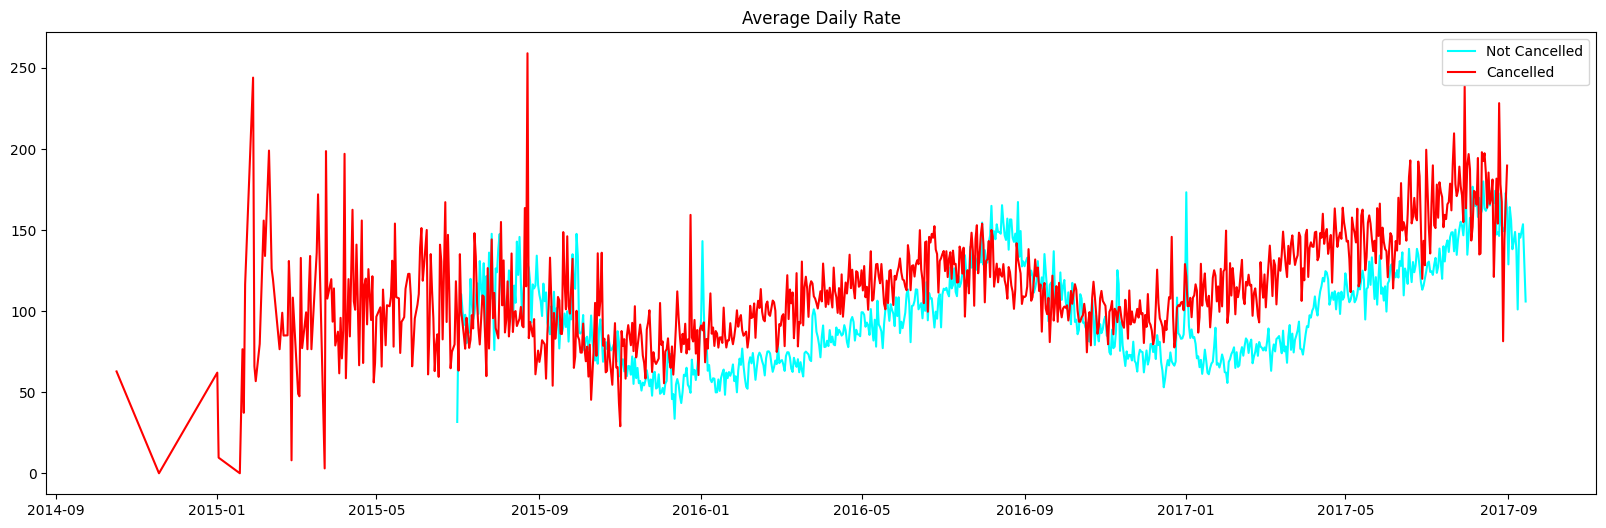

In [67]:
# Now more cancellations are also from online reservation so it might be due to several factors like inaccurate pictures of hotel etc

# Group by reservation_status_date and calculate mean of 'adr' for cancelled data
cancelled_data_adr = cancelled.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date', inplace=True)

# Filter out not cancelled data
data_not_cancelled = df[df['is_canceled'] == 0]

# Group by reservation_status_date and calculate mean of 'adr' for not cancelled data
not_cancelled_data_adr = data_not_cancelled.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date', inplace=True)

# Plotting
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], label='Not Cancelled', color = 'cyan')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], label='Cancelled',color = 'red')
plt.legend()
plt.show()
